# Neural & Behavioral Modeling - Week 8 (Exercises)
by Ting-Yu, Lin (tylin.amice@gmail.com)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Replicate exisiting findings/models (10 points)

Based on your personal interest, please choose and replicate ONE of the following studies. You can replicate 1-2 core figures/tables instead of everything in the paper.

### 1.1 Embodied Cognition

1.1.1 Thelen, E., Schöner, G., Scheier, C., & Smith, L. B. (2001). The dynamics of embodiment: A field theory of infant perseverative reaching. Behavioral and Brain Sciences, 24(1), 1-86.

1.1.2 Schöner, G., & Thelen, E. (2006). Using dynamic field theory to rethink infant habituation. Psychological Review, 113(2), 273.

### 1.2 Instructed Learning

1.2.1 Biele, G., Rieskamp, J., & Gonzalez, R. (2009). Computational models for the combination of advice and individual learning. Cognitive Science, 33(2), 206-242.

1.2.2 Doll, B. B., Jacobs, W. J., Sanfey, A. G., & Frank, M. J. (2009). Instructional control of reinforcement learning: A behavioral and neurocomputational investigation. Brain Research, 1299, 74–94.

1.2.3 Li, J., Delgado, M. R., & Phelps, E. A. (2011). How instructed knowledge modulates the neural systems of reward learning. Proceedings of the National Academy of Sciences, U.S.A., 108, 55–60. (Their <a href=http://www.pnas.org/lookup/suppl/doi:10.1073/pnas.1014938108/-/DCSupplemental/sapp.pdf>supplementary document</a> contains more details about their model.)

1.2.4 Walsh, M. M., & Anderson, J. R. (2011). Modulation of the feedback-related negativity by instruction and experience. Proceedings of the National Academy of Sciences, U.S.A., 108, 19048–1905. (Their <a href=http://www.pnas.org/highwire/filestream/607302/field_highwire_adjunct_files/0/pnas.201117189SI.pdf>supplementary document</a> contains more details about their model.) 

(用行為data去fit不同model)

### &#10003;1.3 Sequence Memory

&#10003;1.3.1 Henson, R. N. (1998). Short-term memory for serial order: The start-end model. Cognitive Psychology, 36(2), 73-137. (Here is a <a href=https://memory.psych.mun.ca/models/startend/js/>Javascript implementation</a>.) <b>(Demonstration1 & Demonstration2)</b>

In [2]:
%config IPCompleter.greedy=True 
%matplotlib inline
# from numpy import *
import numpy as np
from matplotlib.pyplot import *
from IPython.display import *

#### Model Parameters & Functions

In [224]:
#model parameters
Nitems = 6 #number of items
NSim = 1000
SM = np.zeros(Nitems) #start marker
EM = np.zeros(Nitems) #end marker
F0 = 0.6 #E0/S0
F = 0.6 #E/S
S0 = 1
S = 0.8
E0 = S0*F0
E = S*F
Gc = 0.08 
ri = 0 #simpleat form of SEM, r(i) = 1
Rs = 0.5
T0 = 0.35
#Srand = np.random.normal(0, Gc, Nitems*Nitems).reshape(Nitems,Nitems) #

Overlap = np.zeros(Nitems*Nitems).reshape(Nitems,Nitems)
CompeteResponse = np.zeros(Nitems*Nitems).reshape(Nitems,Nitems)
recalls = np.zeros(Nitems*NSim).reshape(NSim,Nitems)
ACC = np.zeros(Nitems)
outputPosition = np.zeros(Nitems)


#surpression
#for i in range(Nitems):
#    for j in range(Nitems):
#        rand = np.random.normal(0, Gc, 1)
#        CompeteResponse[i][j] = Overlap[i][j]*(1-ri) + rand


#surpression(simplest)
def RunSimulation():
    for k in range(NSim):
        #cauculate start markers 
        for i in range(Nitems):
            SM[i] = S0*S**(i)
            EM[i] = E0*E**((Nitems-1)-i)
        
        #cauculate overlap
        for i in range(Nitems):
            for j in range(Nitems):
                Overlap[i][j] = (SM[i]*SM[j]+EM[i]*EM[j])**(1/2)*np.exp(-((SM[i]-SM[j])**(2)+(EM[i]-EM[j])**(2))**(1/2))
        
        #cauculate CompeteResponse (Suprression & Select)
        for i in range(Nitems):
            for j in range(Nitems):
                rand = np.random.normal(0, Gc, 1)    
                CompeteResponse[i][j] = Overlap[i][j]*(1-ri) + rand
        
        #Select and Change CR
        for i in range(Nitems):
            if np.amax(CompeteResponse[i]) >= T0:   #if > Threshold, then recall
                recallitem = np.where(CompeteResponse[i] == np.amax(CompeteResponse[i]))[0][0]
                recalls[k][i] = recallitem

                for l in range(Nitems):   #if recall, then suprression(follow update rule: B6)
                    if l > i:
                        r0 = 1*(np.exp(-Rs))**(l-i-1)
                        CompeteResponse[l][recallitem] = Overlap[l][recallitem]*(1-r0) + rand
                        #CompeteResponse[l][int(recalls[k][i])] = Overlap[i][j]*(1-ri*(np.exp(-Rs))**(l-i-1)) + rand
            else:   #no item recall
                recalls[k][i] = -1    
                    
        ##select
        #for i in range(Nitems):
        #    if np.amax(CompeteResponse[i]) >= T0:
        #        recalls[k][i] = np.where(CompeteResponse[i] == np.amax(CompeteResponse[i]))[0][0]
        #    else:
        #        recalls[k][i] = -1
#應該是CompeteResponse沒算好
def getACC():
    for i in range(Nitems):
        correct = 0
        for k in range(NSim):
            if recalls[k][i] == i:
                correct+=1
        ACC[i] = correct/NSim

RunSimulation()
getACC()

### Figure2
$Nitems = 6,  S_0=E_0=1.00,  S=E=0.08$

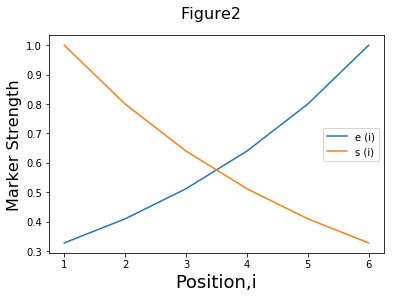

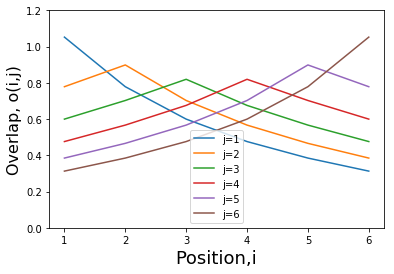

In [197]:
import matplotlib.pyplot as plt
#parameter for Figure2
f2SM = np.zeros(Nitems) #start marker
f2EM = np.zeros(Nitems) #end marker
f2S0 = 1
f2S = 0.8
f2E0 = 1
f2E = 0.8
f2Overlap = np.zeros(Nitems*Nitems).reshape(Nitems,Nitems)
for i in range(Nitems):
    f2SM[i] = f2S0*f2S**(i)
    f2EM[i] = f2E0*f2E**((Nitems-1)-i)
for i in range(Nitems):
    for j in range(Nitems):
        f2Overlap[i][j] = (f2SM[i]*f2SM[j]+f2EM[i]*f2EM[j])**(1/2)*np.exp(-((f2SM[i]-f2SM[j])**(2)+(f2EM[i]-f2EM[j])**(2))**(1/2))


#plot
fig1 = plt.figure(1)
f2EMline = plt.plot(range(1,Nitems+1),f2EM, label="e (i)")
f2SMline = plt.plot(range(1,Nitems+1),f2SM, label="s (i)")
#fig.suptitle('Figure2', fontsize=20)
plt.legend(loc='best')
plt.xlabel('Position,i', fontsize=18)
plt.ylabel('Marker Strength', fontsize=16)

fig2 = plt.figure(2)
for i in range(Nitems):
    plt.plot(range(1,Nitems+1),f2Overlap[i],label="j="+str((i+1)))
axes = plt.gca()
axes.set_ylim([0,1.2])

plt.legend(loc='best')
plt.xlabel('Position,i', fontsize=18)
plt.ylabel('Overlap, o(i,j)', fontsize=16)

fig1.suptitle('Figure2', fontsize=16)

plt.show()

### Figure4
$F=F_0=0.6$

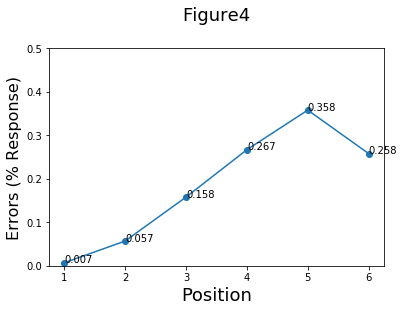

In [225]:
import matplotlib.pyplot as plt

#Figure4-1
error=1-ACC

fig = plt.figure()
plt.plot(range(1,Nitems+1),error,'-o')

axes = plt.gca()
axes.set_ylim([0,0.5])
for a,b in zip(range(1,Nitems+1), error): 
    plt.text(a, b, str(b))
plt.title('Figure4',y=1.1,fontsize=18)
plt.xlabel('Position', fontsize=18)
plt.ylabel('Errors (% Response)', fontsize=16)



plt.show()

#### Figure4-2

108
183
183
213
220
277
320
375
384
386
386
491
491
523
543
558
628
645
681
714
786
823
887
918
955


Text(0,0.5,'Repetitions (%Response)')

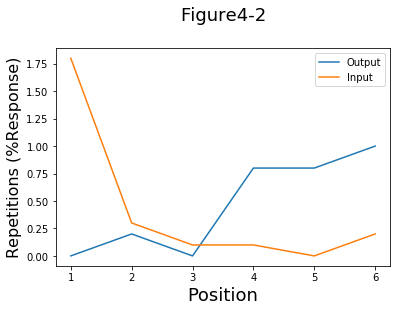

In [226]:
#Figure4-2 Need Check
#RepetitionsTemp = np.zeros(Nitems*NSim).reshape(NSim,Nitems)
RepetitionsInput = np.zeros(Nitems)
RepetitionsOutput = np.zeros(Nitems)

#Need Check
for i in range(NSim):
    unique, counts = np.unique(recalls[i], return_counts=True)
    for j in range(len(unique)):
        if counts[j] >=2:
            print(i)
            RepetitionsInput[int(unique[j])] += counts[j]-1 #input好抓
            index, = np.where(recalls[i] == unique[j])
            for l in range(len(index)):
                if index[l] != unique[j]:
                    RepetitionsOutput[index[l]]+=1
            
fig1 = plt.figure(1)
plt.title('Figure4-2',y=1.1,fontsize=18)
OutputFig = plt.plot(range(1,Nitems+1),RepetitionsOutput*100/NSim, label="Output")
InputFig = plt.plot(range(1,Nitems+1),RepetitionsInput*100/NSim, label="Input")
#fig.suptitle('Figure2', fontsize=20)
plt.legend(loc='best')
plt.xlabel('Position', fontsize=18)
plt.ylabel('Repetitions (%Response)', fontsize=16)



In [220]:
count = 0
a = np.array([28,33,97,124,180,222,239,251,370,398,415,493,571,579,733,814,852,887,998])
for i in range(len(a)):
    if recalls[a[i]][0] != 0:
        count+=1
        print(a[i])
print(count)


0


In [216]:
recalls[348]

array([ 1.,  0.,  2.,  3.,  4.,  5.])

#### Figure4-3

Text(0,0.5,'Omissions (%Response)')

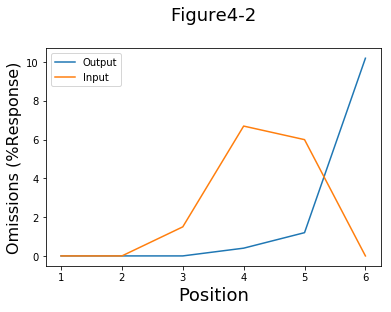

In [227]:
#Figure4-3 Need Check
#RepetitionsTemp = np.zeros(Nitems*NSim).reshape(NSim,Nitems)
OmissionsInput = np.zeros(Nitems)
OmissionsOutput = np.zeros(Nitems)
standrad = np.arange(Nitems)

for i in range(NSim):
    Omissions = np.setdiff1d(standrad, recalls[i])
    for l in range(len(Omissions)):
        OmissionsInput[Omissions[l]]+=1
    if np.count_nonzero(recalls[i] == -1) >= 1:
        index, = np.where(recalls[i]==-1)
        for j in range(len(index)):
            OmissionsOutput[int(index[j])] +=1
          
fig1 = plt.figure(1)
plt.title('Figure4-2',y=1.1,fontsize=18)
OutputFig = plt.plot(range(1,Nitems+1),OmissionsOutput*100/NSim, label="Output")
InputFig = plt.plot(range(1,Nitems+1),OmissionsInput*100/NSim, label="Input")
#fig.suptitle('Figure2', fontsize=20)
plt.legend(loc='best')
plt.xlabel('Position', fontsize=18)
plt.ylabel('Omissions (%Response)', fontsize=16)




### Figure 5

In [228]:
TG = np.zeros(Nitems*Nitems).reshape(Nitems,Nitems)
def getTG():
    for i in range(NSim):
        for j in range(Nitems):
            if recalls[i][j] == j:
                TG[j][j] += 1
            elif recalls[i][j]!=-1:
                #print(recalls[i][j])
                TG[j][int(recalls[i][j])] +=1
#    TG = np.divide(TG, NSim)

getTG()

/Users/tylin/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


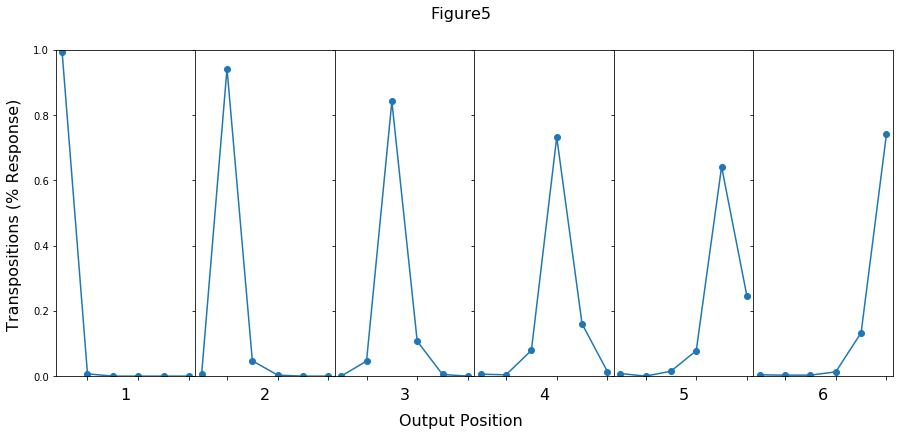

In [229]:
import matplotlib.pyplot as plt
ax = fig.add_subplot(111)
fig, axs = plt.subplots(1,Nitems, figsize=(15, 6), facecolor='w', edgecolor='w')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
fig.suptitle('Figure5', fontsize=16)
fig.text(0.08, 0.5, 'Transpositions (% Response)', va='center', rotation='vertical', fontsize=16)
fig.text(0.5, 0.01, 'Output Position', ha='center', fontsize=16)

for i in range(Nitems):
    axs[i].plot(range(1,Nitems+1),TG[i]/NSim,'-o')
    axs[i].set_ylim([0,1])
    #axs[i].setxlabel
    axs[i].set_xlabel(str(i+1), fontsize=16)
    axs[i].set_xticklabels([])
    if i !=0 :
        axs[i].set_yticklabels([])

plt.show()